In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import pandas as pd

In [78]:
conv = []
tau = []

def f(x):
    return np.piecewise(x , [ (x>0) & (x<1) , (x>1) & (x<2) , (x>2) & (x<3) ,(x>3) ] , [ lambda x: x , lambda x: 2-x , lambda x: x-2 ,1 ] )

def g(x):
    return np.piecewise(x , [ (x<0.25) & (x>2.25) , (x>0.25) & (x<2.25) ]  ,  [0,1 ] )

for i in np.arange(-8,8,0.1):
    
    def h(x):
      return f(x)*g(-x-i)

    I , err= quad(h, -20, 20)
    conv.append(I)
    tau.append(i)

/tmp/ipykernel_2035/2539054593.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I , err= quad(h, -20, 20)


In [20]:
conv = []
tau = []

def f(x):
    return np.piecewise(x , [ (x <= -1/2) & (x>-30) , (x>-1/2) & (x<1/2) , (x>=1/2) & (x<30) ]  ,  [0,1,0] )

def g(x):
    return np.piecewise(x , [ (x <= -1/2) & (x>-30) , (x>-1/2) & (x<1/2) , (x>=1/2) & (x<30) ]  ,  [0,0.5,0] )

for i in np.arange(-8,8,0.1):
    
    def h(x):
      return f(x)*g(-x-i)

    I , err= quad(h, -20, 20)
    conv.append(I)
    tau.append(i)

/tmp/ipykernel_4249/2020919250.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I , err= quad(h, -20, 20)


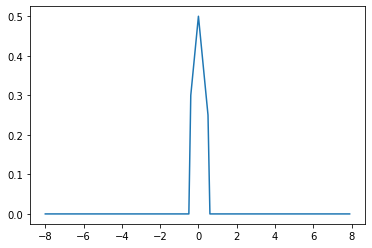

In [21]:
plt.plot(tau , conv)

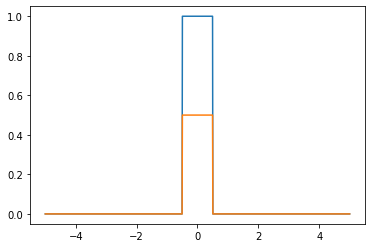

In [22]:
x = np.linspace(-5,5,1000)

plt.plot(x , f(x))
plt.plot(x , g(x))

In [6]:
data_convolution = pd.DataFrame()
g_data = pd.DataFrame(columns = x)

data_convolution['t'] = tau
data_convolution['x'] = x
data_convolution['conv'] = conv
data_convolution['f'] = f(x)
data_convolution['g'] = g(x)

In [10]:
for i in range(len(tau)):
    g_data.loc[i,:] = g(-x+tau[i])

g_data

,-8.0,-7.9,-7.8,-7.7,-7.6,-7.5,-7.4,-7.3,-7.2,-7.1,...,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9
0,1.0,0.99005,0.960789,0.913931,0.852144,0.778801,0.697676,0.612626,0.527292,0.444858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.99005,1.0,0.99005,0.960789,0.913931,0.852144,0.778801,0.697676,0.612626,0.527292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.960789,0.99005,1.0,0.99005,0.960789,0.913931,0.852144,0.778801,0.697676,0.612626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.913931,0.960789,0.99005,1.0,0.99005,0.960789,0.913931,0.852144,0.778801,0.697676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.852144,0.913931,0.960789,0.99005,1.0,0.99005,0.960789,0.913931,0.852144,0.778801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.778801,0.852144,0.913931,0.960789,0.99005,1.0,0.99005,0.960789,0.913931,0.852144
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.697676,0.778801,0.852144,0.913931,0.960789,0.99005,1.0,0.99005,0.960789,0.913931
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.612626,0.697676,0.778801,0.852144,0.913931,0.960789,0.99005,1.0,0.99005,0.960789
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.527292,0.612626,0.697676,0.778801,0.852144,0.913931,0.960789,0.99005,1.0,0.99005


In [16]:
data_convolution.to_csv('data_convolution.csv' , index = False)

In [16]:
g_data.to_csv('g_data.csv' , index = False)